Exploretory data analysis copyd from logboek_ivar

Week 1  
20-11-2024  
Tasks  
Reading in on the project and its data.  
Discussing the data with Maartje en Michiel.  
Making new data files and a codebook.  

Reading the project and its data.
When looking at the project is clear on what Fenna wants from the data. the goal here is to make a dashboard with 2 focuses. one for reasearch and one for farmers and regulators. the one for reasearch will have a heavy focus on statistics and the one for farmers will have a more general aproach mainly shown with basic plots and precentage's and if its statistiscly significant.

Discussing the data with Maartje en Michiel
When looking at the data in the file its clear that its not optimal as input data for scripting in python. This is becouse of the meta data and avrige lines in between the data tables, this couses problems when using it as input data in python. There are also some collums that 2024 and but not 2023. After discussing this with both Maartje en Michiel it was decided to make 2 new files with 2 codebooks so that it can be used in a script

Started working on the new data set so it can be proccesed better by python
as prevusly mentiont above.  
finisht 24-11-2024

Week 1  
21-11-2024  
Task  
continue working on the clean data exel files from 20-11-2024
Codebook was helpt with the codes of Eurovins (https://www.eurofins-agro.com/nl-nl/suiker). This was also the company that did the grass analysis

Note 
Talkt with bart about the data and he adviced the use of pandas library for dataframes instead of making a database becouse of the reletievly smal amount of data.

Week 1  
24-11-2024  
Tasks  
Data reading and updating logfile  
Today i finisht making the new datafiles and started reading them in. Reading in the files was a little weird at first and turning the excel file into a csv did produce the desired dataframe so from the module pandas along with the submodule openpyx1(This allows pandas to read .xlsx files) i read in both data files as an excel file.

Comments on the 2 code sections below  
1st code blok reads in the data and prints information about the dataframe with the info function of pandas. From this i can tell that in both files all the collums are from the data type that i expected and there are no NaN's or empty sections in all the rows.

The 2nd code blok displays the dataframe with again now oditys showing. one point is that i might want to change the "behandeling" treatment collums value's from single letters to the acutal method used so that this its clearer what is happening in a plot and makes it simpler for later treatment methods to be added.

In [1]:
#import code chunk
# visual
import matplotlib
import seaborn

# data based
import pandas
import numpy
import scipy
import param
# app interface
import panel
import statsmodels

In [2]:

# Reading in the data with pandas + openpyx1
data_2023 = pandas.read_excel("..\\Raw_data\\clean_data_2023.xlsx")
data_2024 = pandas.read_excel("../Raw_data/clean_data_2024.xlsx")
#print(data_2023.info())
print(data_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Strook_O_W      64 non-null     int64  
 1   Behandeling     64 non-null     object 
 2   Bloknr          64 non-null     int64  
 3   Jaar            64 non-null     int64  
 4   Snede           64 non-null     int64  
 5   Kuub_kg_h       64 non-null     int64  
 6   PPO_nr          64 non-null     int64  
 7   meters_gemaaid  64 non-null     float64
 8   gemaaid_m2      64 non-null     float64
 9   gewicht _kg     64 non-null     float64
 10  Gewicht_T_H     64 non-null     float64
 11  Vocht           64 non-null     int64  
 12  DS_perc         64 non-null     float64
 13  DS_ton_ha       64 non-null     float64
 14  VEM             64 non-null     int64  
 15  DVE             64 non-null     int64  
 16  OEB             64 non-null     int64  
 17  VEVI            64 non-null     int64

In [3]:
#data_2023
data_2024.head()

,Strook_O_W,Behandeling,Bloknr,Jaar,Snede,Kuub_kg_h,PPO_nr,meters_gemaaid,gemaaid_m2,gewicht _kg,...,Ruw_vet,Chloor,NDF,ADF,ADL,VEM_prod,DVE_prod,OEB_prod,NDF_vs,CW_vert.
0,1,A,15,2024,1,15,314075,5.2,7.80,9.5,...,26,9.1,422,217,12,252,20,-13,81,80.6
1,1,A,16,2024,1,15,313830,5.4,8.10,15.2,...,29,12.0,464,234,17,205,18,-7,111,75.2
2,5,A,7,2024,1,15,313812,4.6,6.90,12.4,...,26,9.8,432,212,13,222,19,-11,85,79.7
3,5,A,8,2024,1,15,313826,5.3,7.95,14.2,...,26,10.5,473,240,17,204,17,-10,127,72.2
4,6,B,5,2024,1,15,313811,5.1,7.65,11.8,...,28,10.9,472,237,16,201,17,-8,110,75.9


Week 2 Exploratieve data analyse  
25-11-2024  
Tasks 
making a joind dataframe on the collums treatment, bloknr, year,snede, gewicht_t_h and VEM for testing.  
make a scatterplot  
pandas.cor (coralatie test)
data normalisation test (shapiro wilks test)   
decided on statisics method after checking gewicht_t_h and VEM normalisation  

Making a subset
code explanation

notes for self
loc works with row number and colnames
for later flexibilty make a logical vector variable that can be used as input for the row selection
astype string as debug option for object collum apears to be redundent

future code snippits

#data_2024["Behandeling"] = data_2024["Behandeling"].astype("string")

test_2024 = data_2024[data_2024["Behandeling"] == "A"]

In [4]:
# dataframe task

filterd_2023 = data_2023.loc[:, ["Jaar", "Snede", "Behandeling", "Gewicht_T_H", "DS_ton_ha","VEM", "VCOS", "DVE", "OEB"]]
filterd_2024 = data_2024.loc[:, ["Jaar", "Snede", "Behandeling", "Gewicht_T_H", "DS_ton_ha","VEM", "VCOS", "DVE", "OEB"]]
merged_data = filterd_2023.merge(filterd_2024,"outer")
#merged_data
frame_list = [filterd_2023,filterd_2024]
empty_frame = pandas.DataFrame()
first_frame = frame_list[0]
for frame in frame_list:
    first_frame.merge(frame,"outer")

first_frame.merge(frame_list[1],"outer")

,Jaar,Snede,Behandeling,Gewicht_T_H,DS_ton_ha,VEM,VCOS,DVE,OEB
0,2023,1,A,22.043011,4.695161,885,75.0,73,-33
1,2023,1,A,22.047244,4.519685,885,75.1,65,-51
2,2023,1,A,22.789784,4.990963,897,76.5,75,-33
3,2023,1,A,26.016260,4.708943,895,76.9,79,-19
4,2023,1,B,21.497121,4.234933,830,72.5,66,-33
...,...,...,...,...,...,...,...,...,...
123,2024,4,C,9.109731,2.004141,847,72.3,70,-15
124,2024,4,D,9.370817,1.752343,842,72.9,71,-6
125,2024,4,D,9.934641,1.748497,845,73.1,74,0
126,2024,4,D,10.699588,1.818930,836,72.1,74,0


Correlatie task finish 27-11-2024
The idea of this task is to make a corralation table to look at the the diffrent treatment methods and if it corralates with any of the values  
https://www.displayr.com/what-is-a-correlation-matrix/
To make treatment a numaric factor of 1 2 -1 -2 this makes is mathmaticly correct and usebel in a corr matrix. In practice this did not work becouse the quostion is do the treaments seppertly have any significant corralations and you cannot use the corralation diffrence with a deviation of 0. Wich is what would happen if used 1 treatment factor for the corralations therefor this produced an error and cannot be measured this way.

27-11-2024
Note ask quistion for specific method to values corralation  
After discussing the corralation problem with bart we descoverd the problem and thought it would be best to make a table to compare values it would be best to discuss this with Fenna at the next meeting.

For the rest in the corralation table you can see a positive corralation between ds_t_h/gewicht_t_h, and VEM/VCOS wich is logical becouse the the values are related. ds and gewicht based on that their both measured in tons an arce and ds is a part of the weight. VEM/VCOS is related for similar reasons(https://www.eurofins-agro.com/nl-nl/vem)

In [5]:
corr_dataframe = merged_data.loc[:, ["Jaar", "Snede", "Behandeling", "Gewicht_T_H", "DS_ton_ha","VEM", "VCOS", "DVE", "OEB"]]
corr_dataframe["Behandeling"] = corr_dataframe["Behandeling"].replace(["A","B","C","D"],[-1,-2,1,2])
# corr_dataframe["Behandeling"].replace("B",-2)
corr_dataframe.loc[:,["Behandeling", "Gewicht_T_H", "DS_ton_ha","VEM", "VCOS", "DVE", "OEB"]].corr()

C:\Users\ivarl\AppData\Local\Temp\ipykernel_19580\348925672.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_dataframe["Behandeling"] = corr_dataframe["Behandeling"].replace(["A","B","C","D"],[-1,-2,1,2])


,Behandeling,Gewicht_T_H,DS_ton_ha,VEM,VCOS,DVE,OEB
Behandeling,1.000000,-0.131077,-0.100800,0.092175,0.122027,-0.017938,-0.091576
Gewicht_T_H,-0.131077,1.000000,0.904792,-0.108138,-0.053242,-0.102309,-0.118240
DS_ton_ha,-0.100800,0.904792,1.000000,0.040487,0.051873,-0.253707,-0.435512
VEM,0.092175,-0.108138,0.040487,1.000000,0.963656,0.578139,-0.544673
VCOS,0.122027,-0.053242,0.051873,0.963656,1.000000,0.623226,-0.474473
DVE,-0.017938,-0.102309,-0.253707,0.578139,0.623226,1.000000,0.353398
OEB,-0.091576,-0.118240,-0.435512,-0.544673,-0.474473,0.353398,1.000000


In [6]:
# selection for cormatrix
# vertor as row input
bolean_vector_null = corr_dataframe["Behandeling"] == 2
# bolean_vector_C = corr_dataframe["Behandeling"] == 1
corr_dataframe.loc[bolean_vector_null,:]

#corr_dataframe.info()
df2 = corr_dataframe.loc[bolean_vector_null] #["Behandeling", "Gewicht_T_H", "DS_ton_ha","VEM", "VCOS", "DVE", "OEB"]
df2.head()

,Jaar,Snede,Behandeling,Gewicht_T_H,DS_ton_ha,VEM,VCOS,DVE,OEB
12,2023,1,2,17.346278,3.209061,922,77.5,75,-38
13,2023,1,2,18.936446,4.431128,940,79.1,71,-57
14,2023,1,2,20.615797,4.329317,898,76.1,68,-49
15,2023,1,2,21.106821,4.791248,928,77.9,73,-49
28,2023,2,2,8.413002,2.204207,878,74.6,69,-32


In [7]:
# discovary standard deviation of 0
df2.describe()

,Jaar,Snede,Behandeling,Gewicht_T_H,DS_ton_ha,VEM,VCOS,DVE,OEB
count,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000
mean,2023.500000,2.500000,2.0,14.214411,2.705508,885.218750,75.781250,73.65625,-24.125000
std,0.508001,1.135924,0.0,5.043213,1.132433,54.038657,3.386923,6.09923,20.943472
min,2023.000000,1.000000,2.0,8.197709,1.413492,788.000000,69.300000,60.00000,-57.000000
25%,2023.000000,1.750000,2.0,9.864549,1.874583,844.250000,73.800000,70.00000,-38.750000
50%,2023.500000,2.500000,2.0,13.186954,2.376768,877.500000,75.400000,73.00000,-28.000000
75%,2024.000000,3.250000,2.0,17.697456,3.169958,919.750000,77.600000,77.25000,-7.500000
max,2024.000000,4.000000,2.0,27.777778,5.611111,1009.000000,83.900000,85.00000,18.000000


In [8]:
# checking for non-null values
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 12 to 127
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jaar         32 non-null     int64  
 1   Snede        32 non-null     int64  
 2   Behandeling  32 non-null     int64  
 3   Gewicht_T_H  32 non-null     float64
 4   DS_ton_ha    32 non-null     float64
 5   VEM          32 non-null     int64  
 6   VCOS         32 non-null     float64
 7   DVE          32 non-null     int64  
 8   OEB          32 non-null     int64  
dtypes: float64(3), int64(6)
memory usage: 2.5 KB


data normality  
Most of the statistical tests are based on if your data is normaly distributed so to check this if run the shapiro-wilks test on each of the collums. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro)  
if the value from row 0 is close to 1 it means it's likely that its been from a normaly distributed dataset  
if the value from row 1 is lower then 0.05 it means it's statisticly significant.  
appart from vcos all collums are normaly distributed and stasticlly significant. 

In [10]:
from scipy import stats
merged_data.loc[:, ["Gewicht_T_H", "DS_ton_ha","VEM", "VCOS", "DVE", "OEB"]].apply(stats.shapiro, axis=0)
#stats.shapiro(merged_data["Gewicht_T_H"])

,Gewicht_T_H,DS_ton_ha,VEM,VCOS,DVE,OEB
0,0.934206,0.922700,0.937674,9.157475e-01,0.985222,0.953432
1,0.000010,0.000002,0.000017,6.903599e-07,0.180236,0.000237


Week 2 25-11-2024  
exploring with seaborn plots

<Axes: xlabel='Behandeling', ylabel='Gewicht_T_H'>

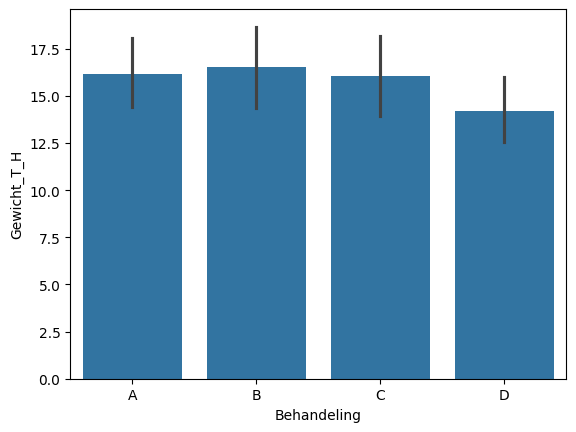

In [11]:
# barplot of a single value with 
seaborn.barplot(merged_data, x="Behandeling", y="Gewicht_T_H")

<Axes: xlabel='VCOS', ylabel='Count'>

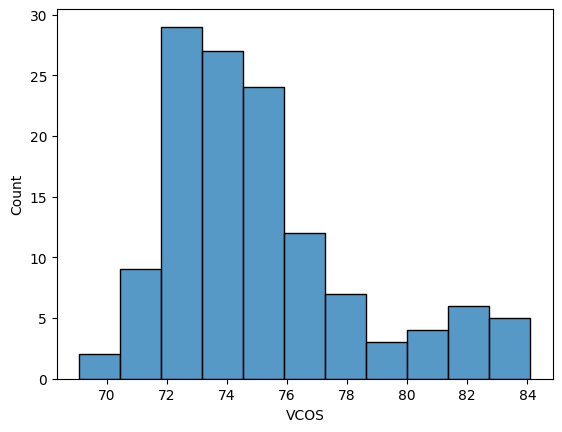

In [12]:
# visualisation normal distribution
seaborn.histplot(merged_data, x="VCOS")

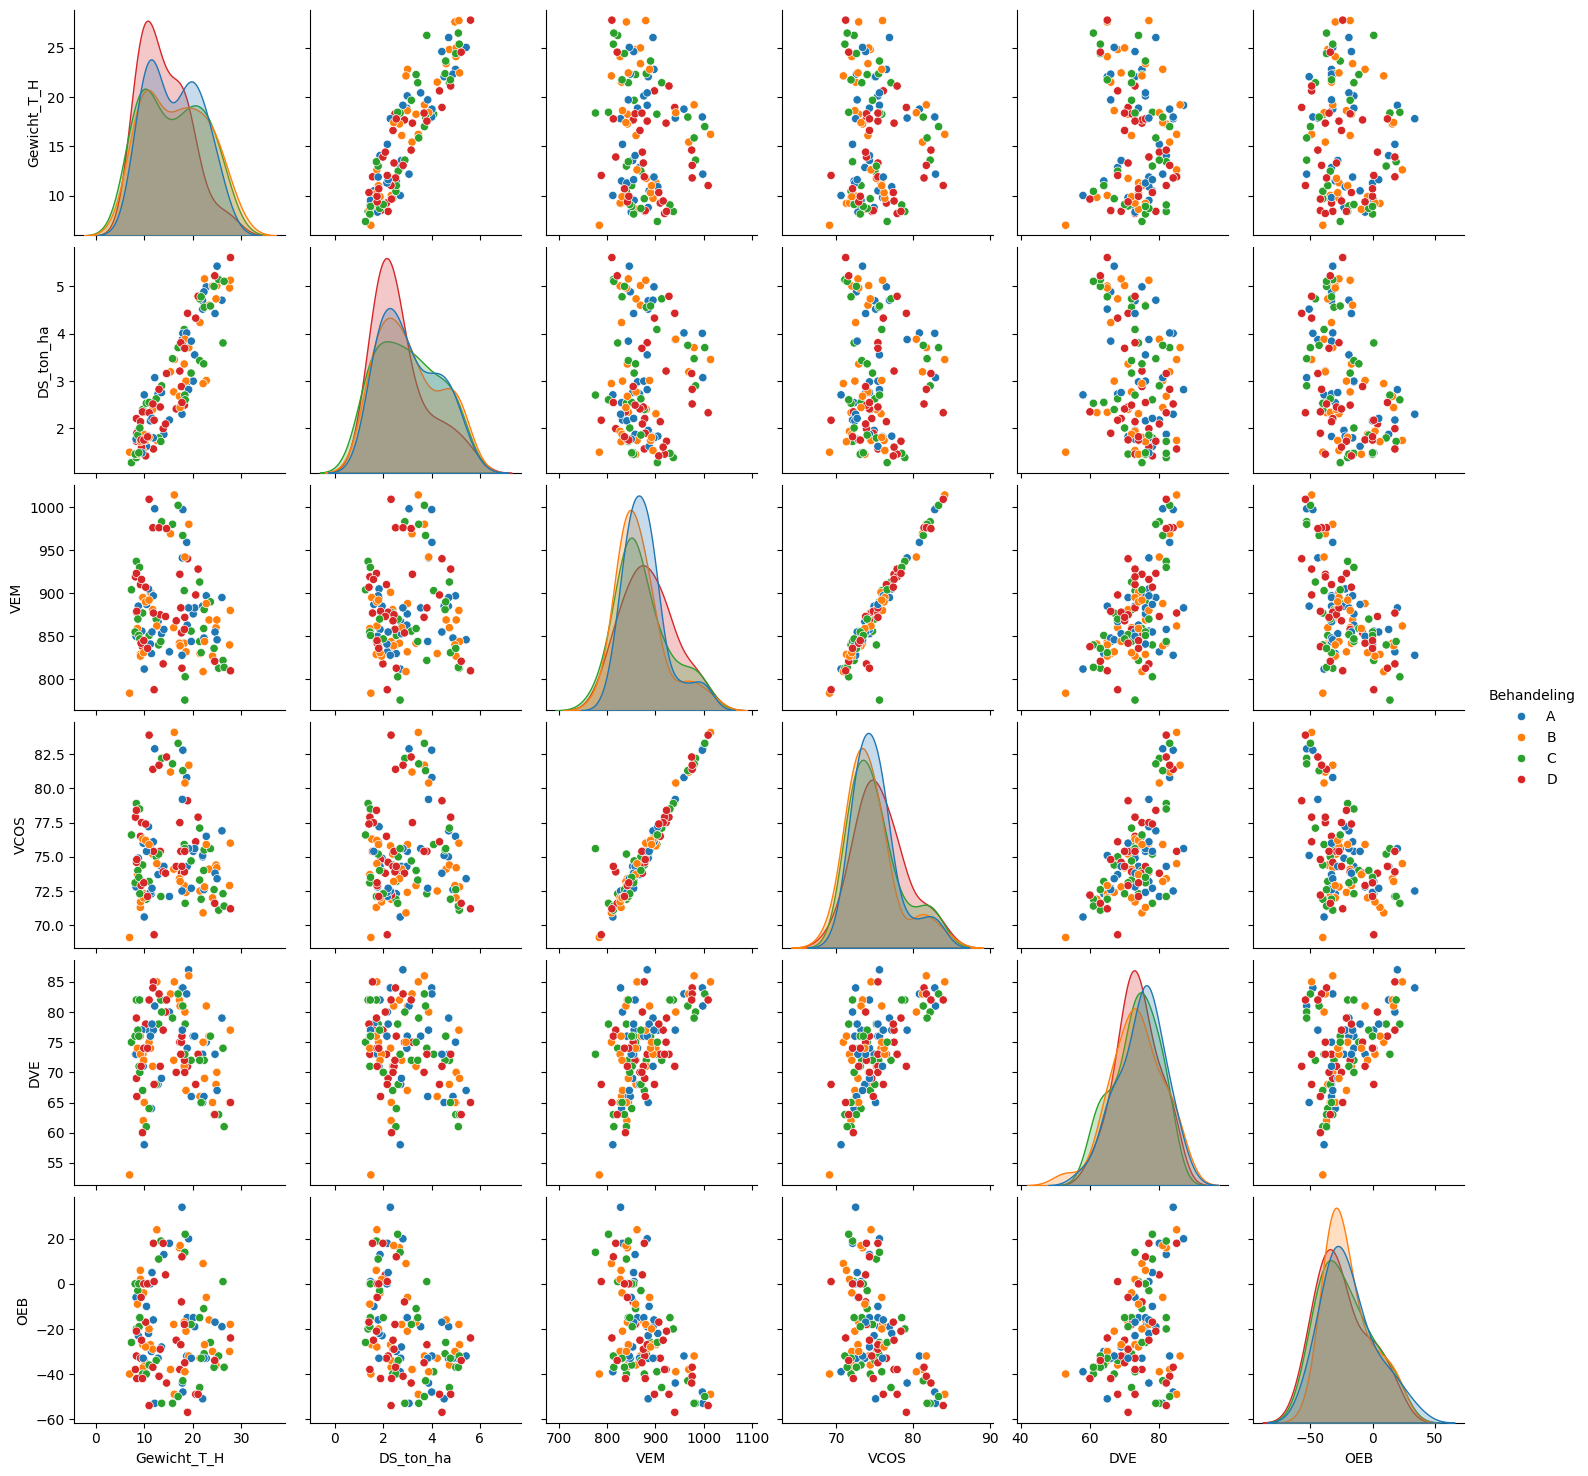

In [13]:
# pairwise plot based on scatterplots and in the midle a distribution plot with treatment as the 3rd dimension
seaborn.pairplot(merged_data.loc[:,["Behandeling","Gewicht_T_H", "DS_ton_ha","VEM", "VCOS", "DVE", "OEB"]], hue="Behandeling");

Week 2 28-11-2024  
Conversation with Fenna 28-11-2024    
Today me and Maarjte had a week update with Fenna. the purpose of this meeting was updating her on the progress of the project and to discuss some elements she wants to have in the aplication.  
Data wise it would be a good idea to have a normalisation option becouse of the fertelizer error that was made in one of the cuts. To find this out a Kemitz (grouping algoritme) was sugested.  
Sub panels with for instance box plots, Anova table, PCA and interaction plot.  
Table idea for comparing means and deviation arcros years is solid.  